![Image in a markdown cell](https://neuro2go.com/wp-content/uploads/2022/07/parkinsons-disease-768x768.jpg)

**Parkinson Disease Detection**

*Introduction*

Parkinson's Disease (PD) is a neurodegenerative disease which affects, movement, posture and agility. It involves the gradual loss of dopamine producing neurons in the substantia nigra of the brain which severely affects, fine motor movement, posture, muscular dexterity and strength. Long before Parkinson's is officially diagnosed, a myriad of symptoms start to appear. The earliest ones are trouble having control over fine motor movement like drawing figures and shapes. While there has been notable figures like Muhammad Ali, Michael J. Fox, and Pope John Paul II haven grappled with PD, there remains no known cure for this affliction.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

In [10]:
!pip install --upgrade scikit-learn

**1.1 Enviroment Setup**

In [4]:
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier


from IPython.display import display

**Data Source**

Dataset Used : Parkinsons Disease Dataset

Dataset Source : UCI Machine Learning Repository

Dataset Hosting URL : https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

**2. Load Data**

The Dataset is load as a Pandas dataframe and show a gimplse of the data as well.


In [6]:
df = pd.read_csv('/content/Parkinsson disease.csv') ## reading data into pandas dataframe
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Data Preprocessing**

The following steps are performed on the dataset in this section:

     - Dropping Redudant Columns
     - Checking For Duplicated Rows
     - Checking For Missing Values


In [7]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [8]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [9]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
## Checking for duplicated samples.
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [12]:
# Checking For Missing Values In Dataset
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

It can be observed from the above step that No Columns of the dataset contains any Missing Values.

In [26]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)

**Exploratry Data Analysis**

[Text(0.5, 1.0, 'Patient Status Distribution')]

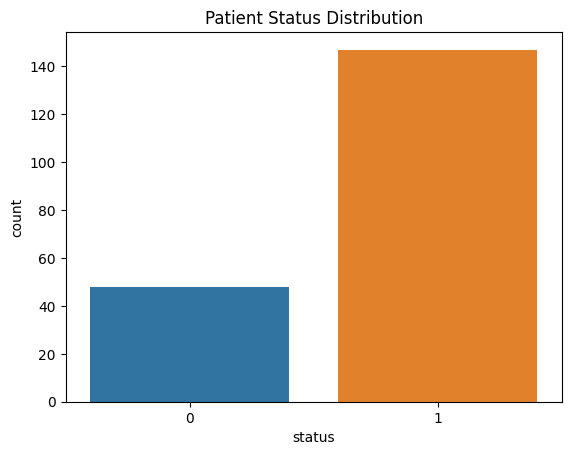

In [27]:
#Balance of Data
sns.countplot(x='status',data=df).set(title='Patient Status Distribution')

<Axes: >

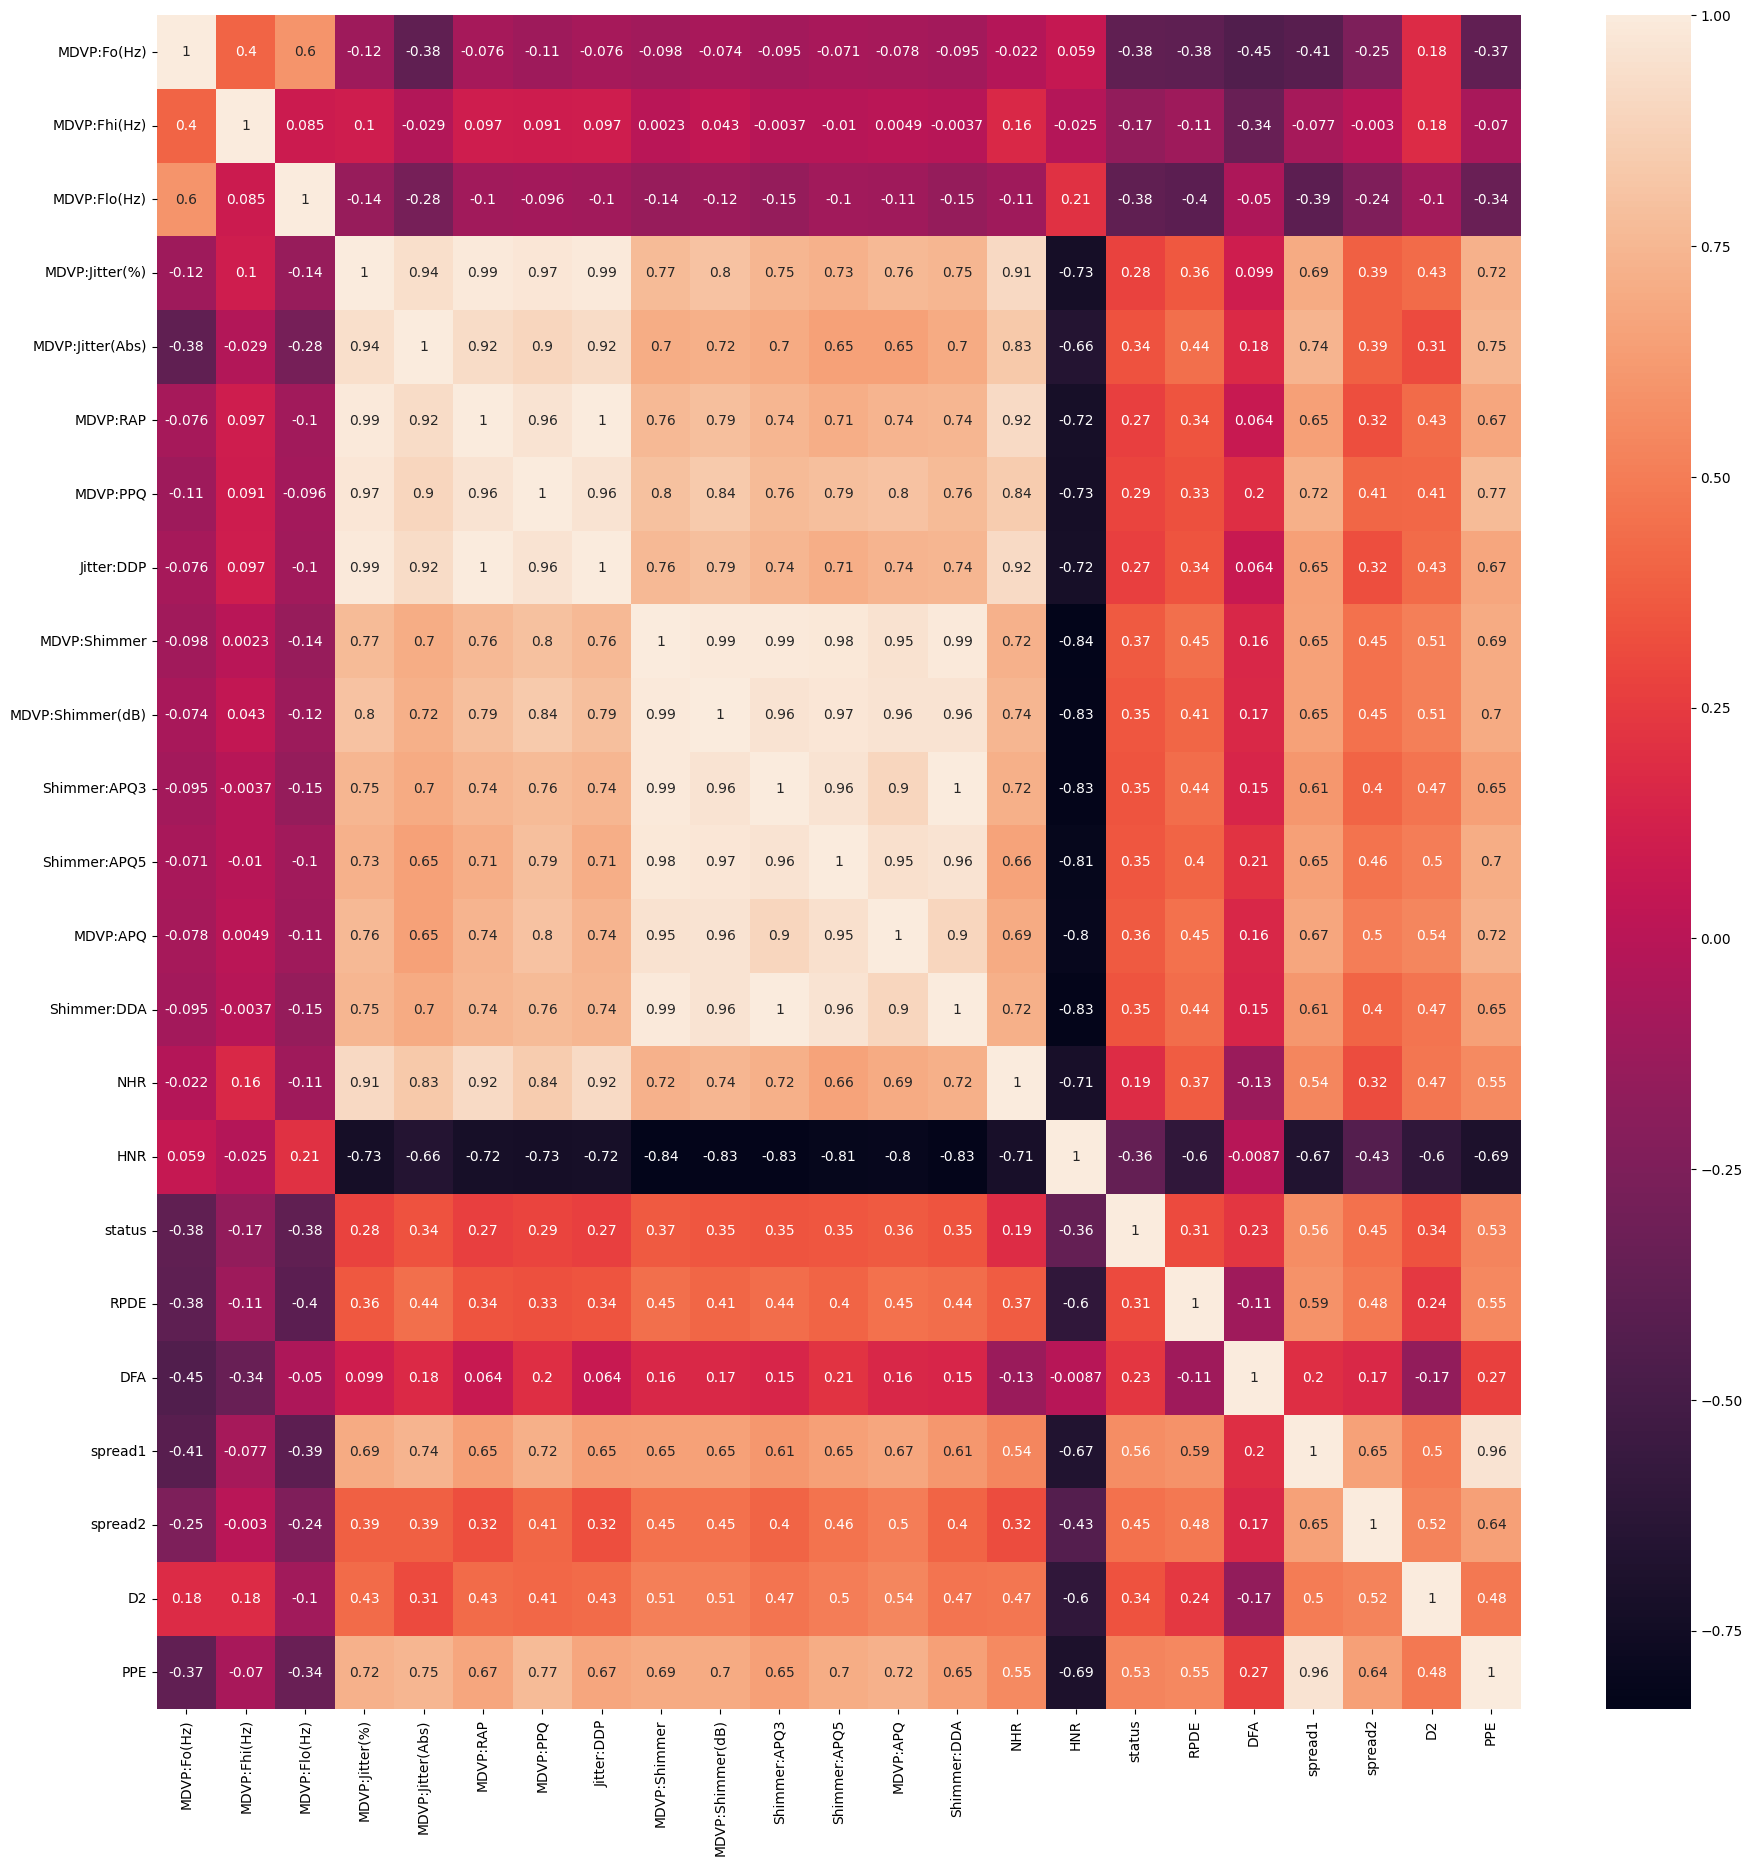

In [28]:
fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(df.corr(),annot=True,ax=ax)


From the above heatmap it can be observed that there is high correlation among variables used in this dataset

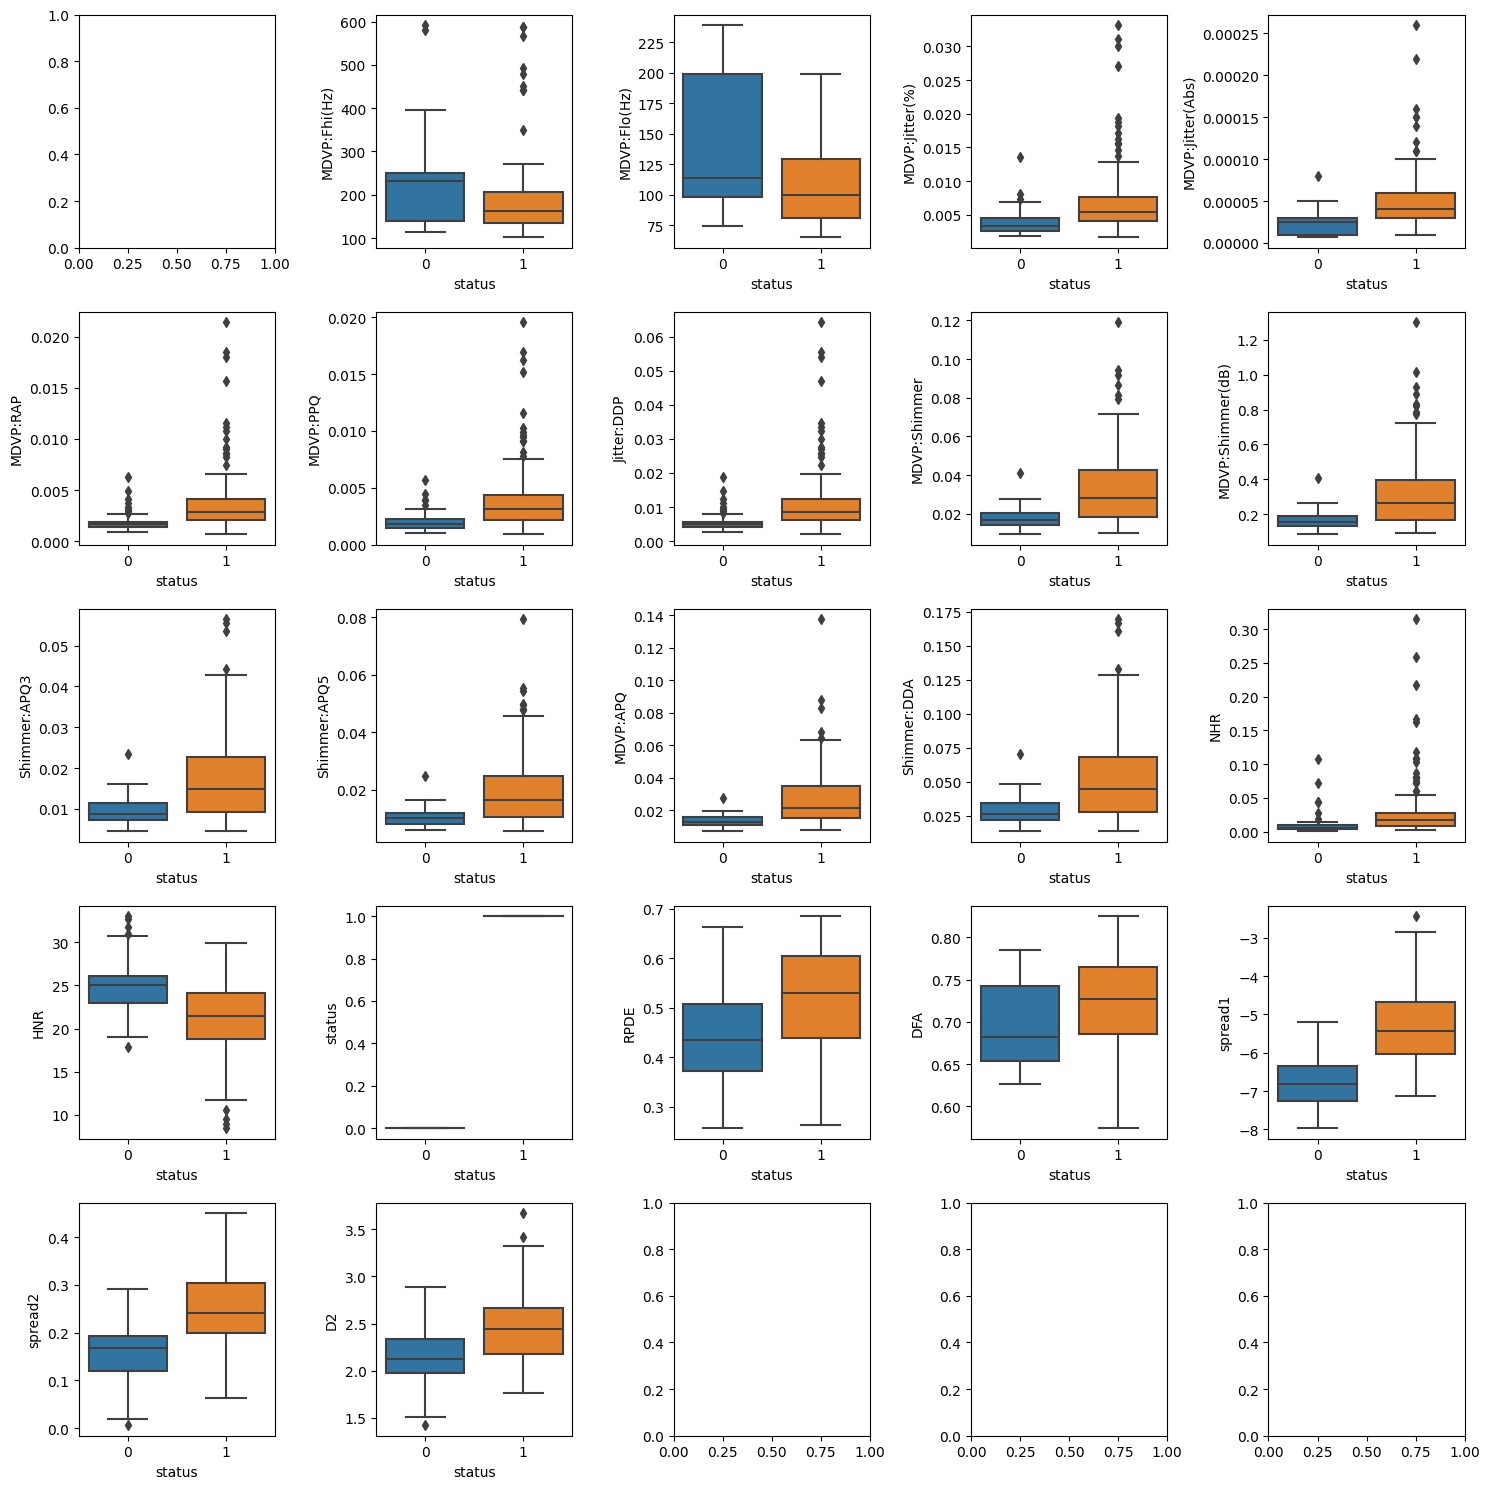

In [29]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()



From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

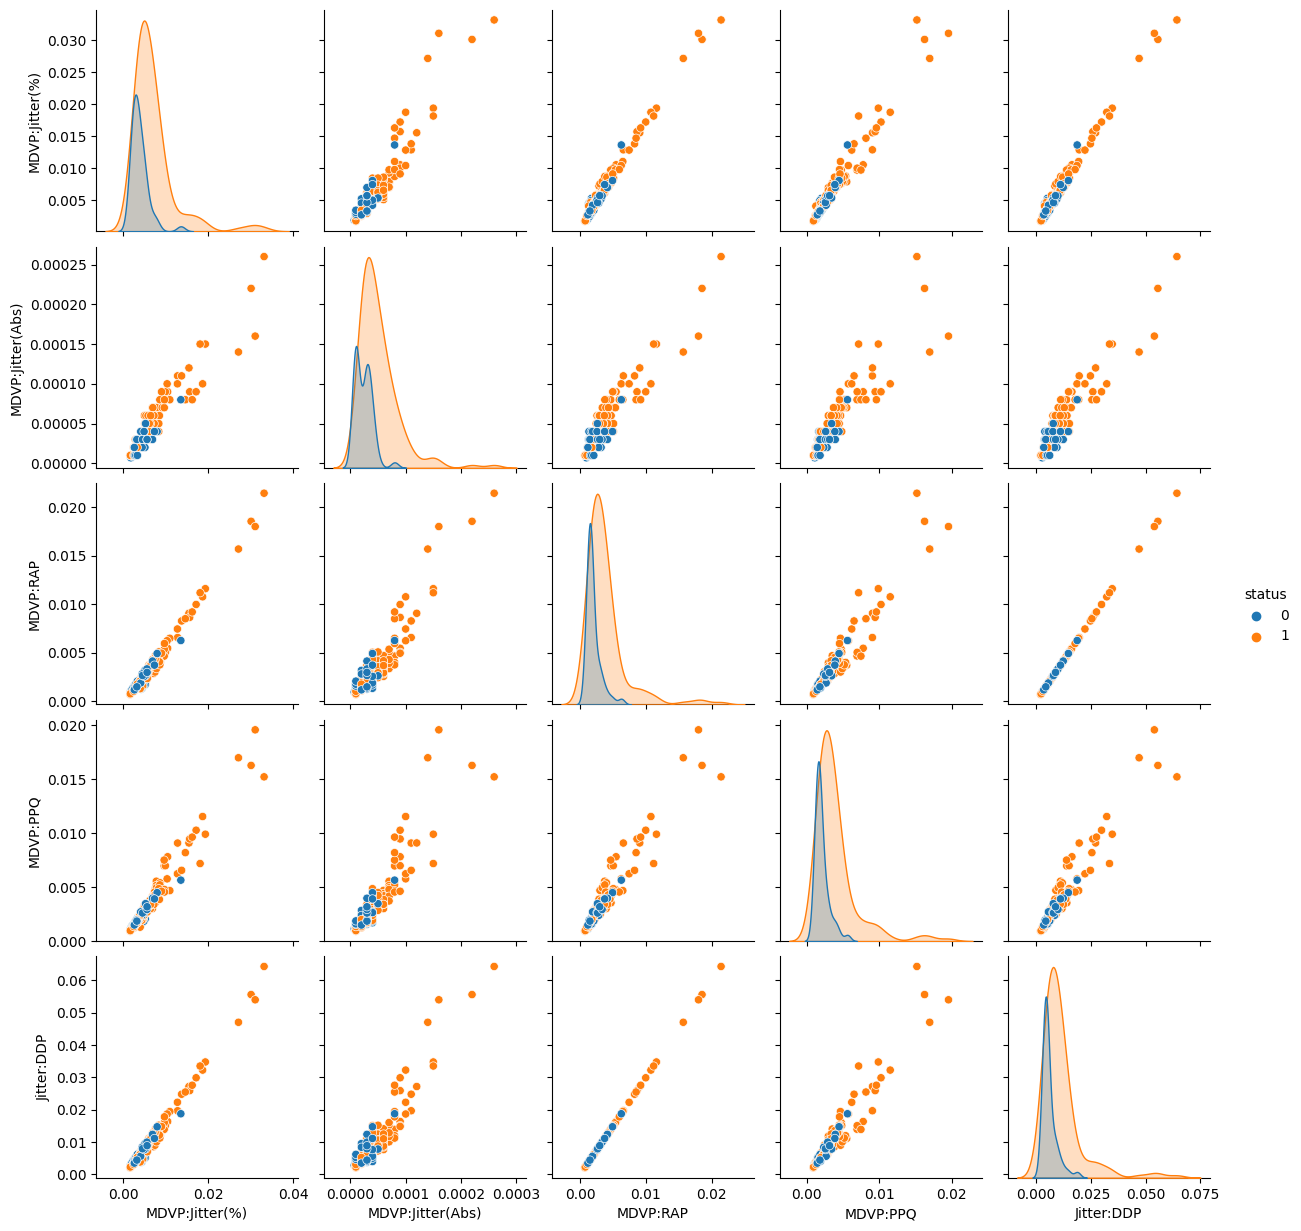

In [30]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

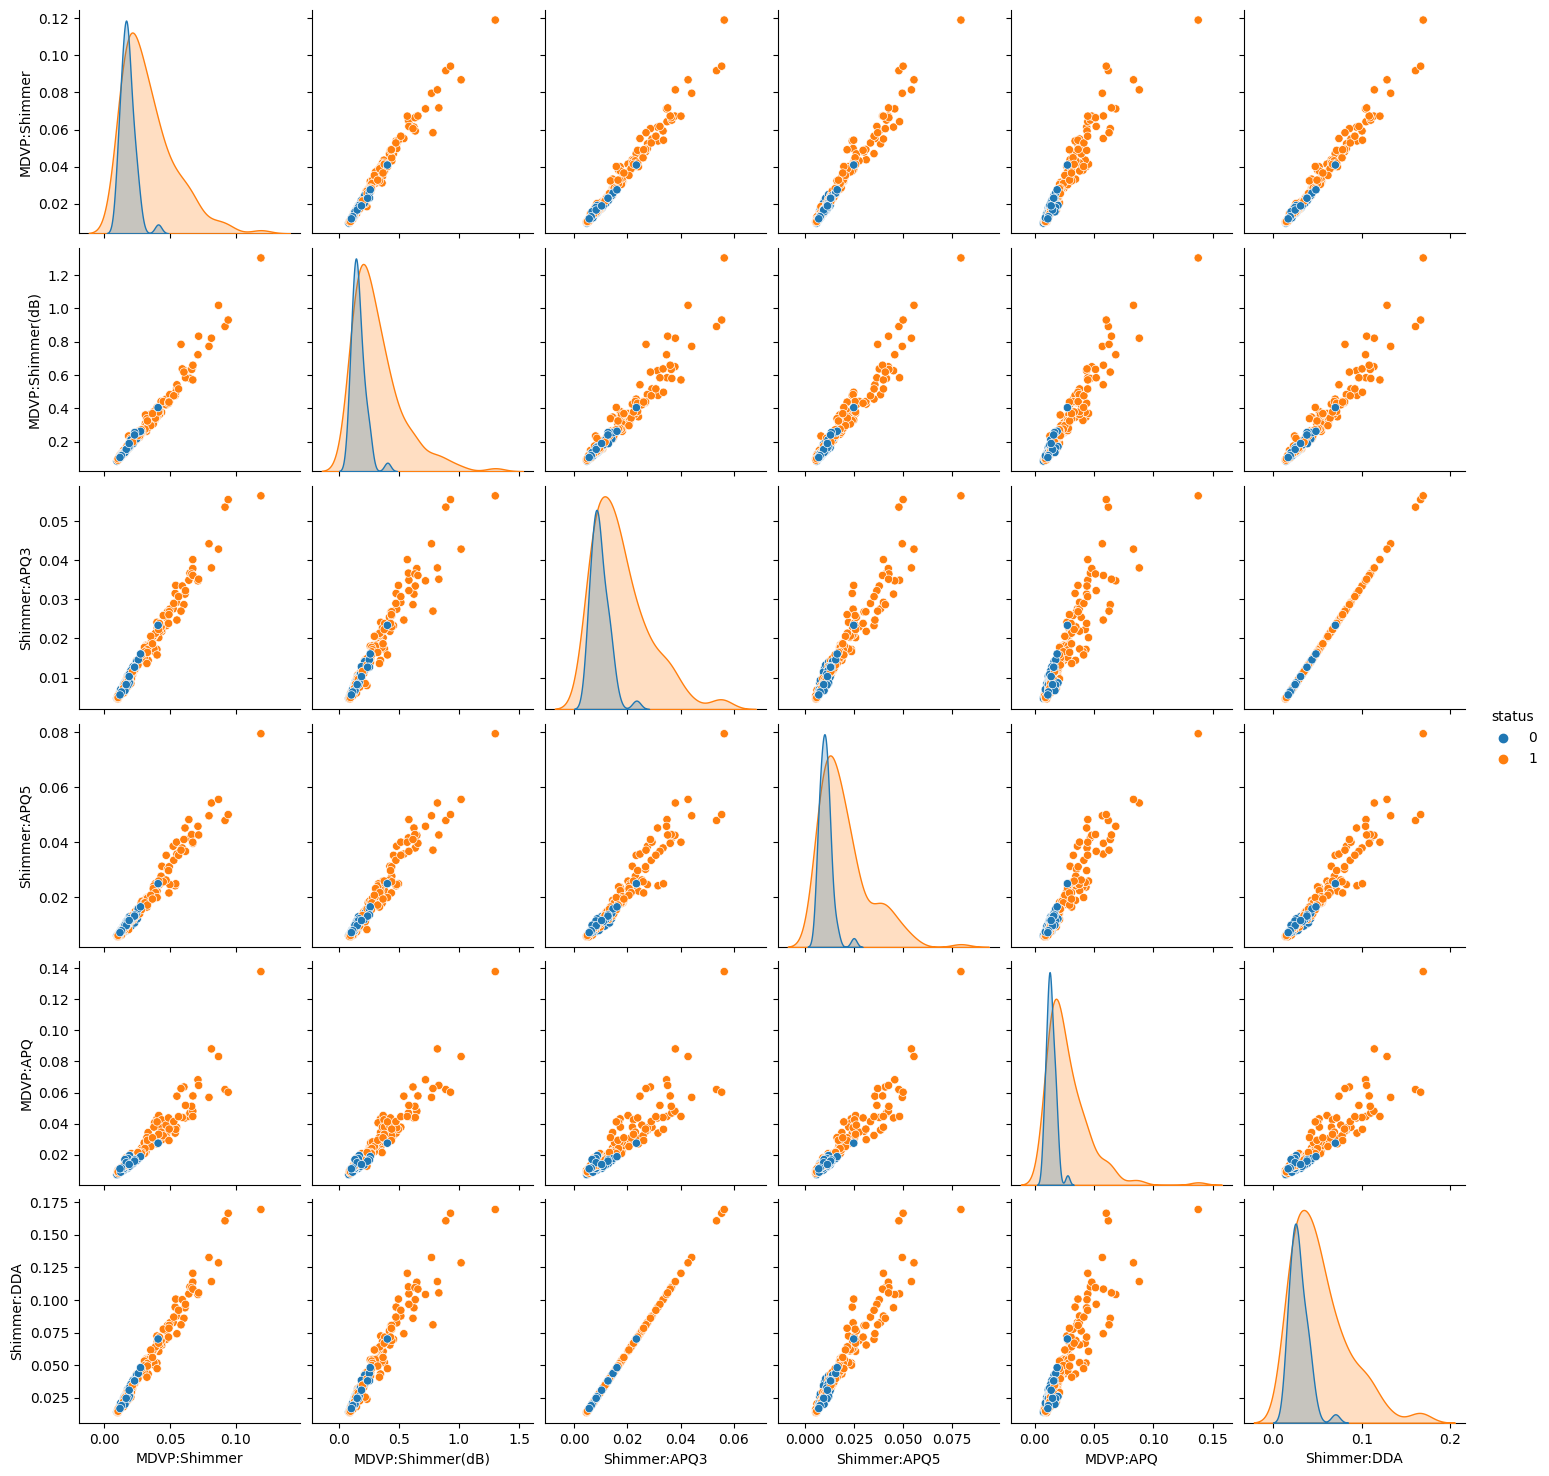

In [31]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

From the above visualization it can be noted that all measures of variation has high correlation among each other variable. This therefore suggest that steps has to be taken make the dataset balance.

**Balancing DataSet**

In this section, as it is observed that the Dataset Is Heavily Imbalanced, with Number of Samples of Parkinson Disease Samples being 147, and Non-Parkinson Being only 48. Hence, in this section, we make use of SMOTE to Oversample and Balance the dataset.


In [32]:
# Exploring Imabalance In Dataset
df['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

In [33]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)


Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [34]:
# Intialising SMOTE Object
sm = SMOTE(random_state=350)

In [35]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [36]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)


Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


In [37]:
# Scaling features between -1 and 1  for mormalization
scaler = MinMaxScaler((-1,1))

In [38]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [39]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

**Machine Learning Model Training**

In this section, we have trained the following Machine Learning Models:

    Decision Tree Classifier
    Random Forest Classifier
    SVM
    Logistic Regression
    KNN Classifier
   

**Decision Tree Classifier**

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.88      0.94        26

    accuracy                           0.95        59
   macro avg       0.96      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59



In [41]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [42]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 90}

In [43]:
dt1=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test)
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.81      0.89        26

    accuracy                           0.92        59
   macro avg       0.93      0.90      0.91        59
weighted avg       0.93      0.92      0.91        59



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


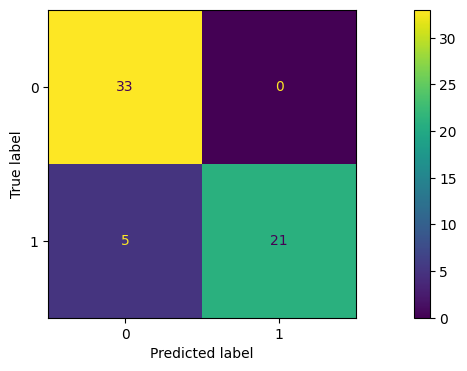

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predDT, labels=clf.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
#plt.show()

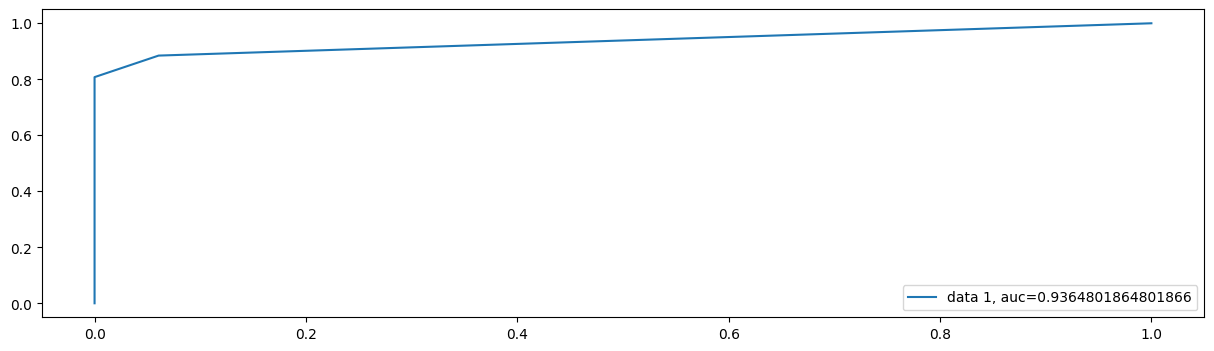

In [73]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Random Forest Classifier**

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [75]:
param_grid = {
    'n_estimators': range(100,300,25),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(100,250,50),
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 300, 25),
                         'random_state': range(100, 250, 50)})

In [76]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100,
 'random_state': 100}

In [125]:
rfc1=RandomForestClassifier(random_state=200, max_features='auto', n_estimators= 125, max_depth=7, criterion='entropy')
rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.96      0.92      0.94        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



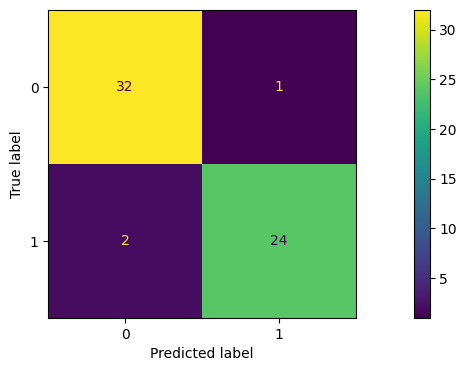

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cmf = confusion_matrix(y_test, predRFC, labels=rfc.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cmf, display_labels=rfc.classes_)
disp.plot()
#plt.show()

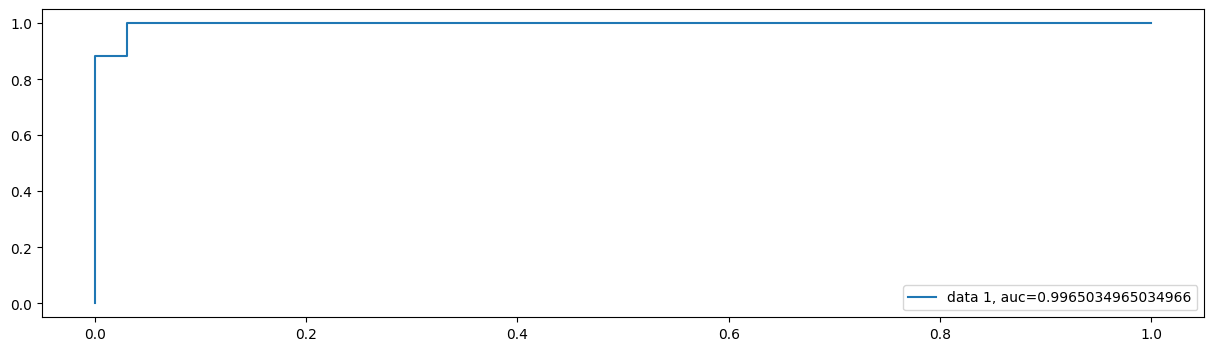

In [127]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**SVM**

In [83]:
#Create a svm Classifier
clf1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf1.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8305084745762712
Train Set Accuracy: 0.851063829787234


In [84]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test)

# print classification report
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.851 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.844 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.837 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

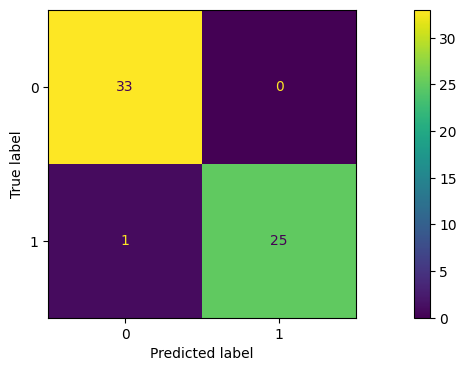

In [97]:
smvf = confusion_matrix(y_test, predSVC, labels=clf1.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=smvf, display_labels=clf1.classes_)
disp.plot()


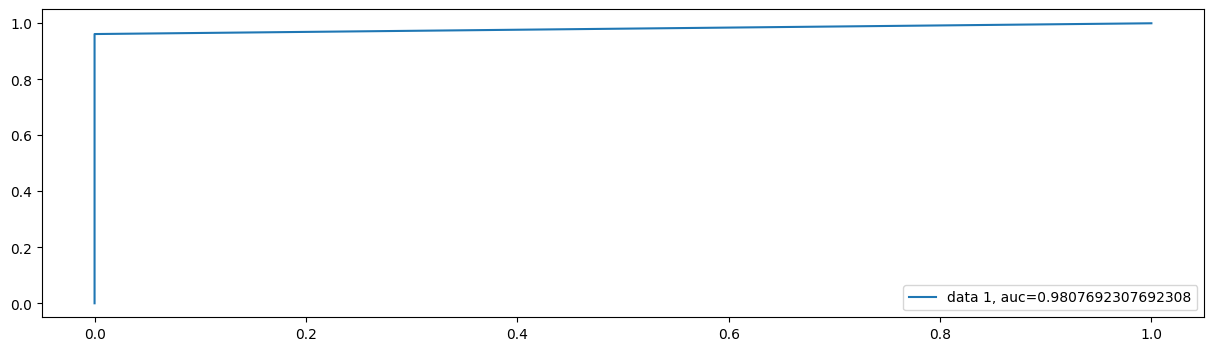

In [92]:

fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


**Logistic Regression**


In [93]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [94]:
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        33
           1       0.95      0.69      0.80        26

    accuracy                           0.85        59
   macro avg       0.87      0.83      0.84        59
weighted avg       0.86      0.85      0.84        59

Confusion Matrix:


array([[32,  1],
       [ 8, 18]])

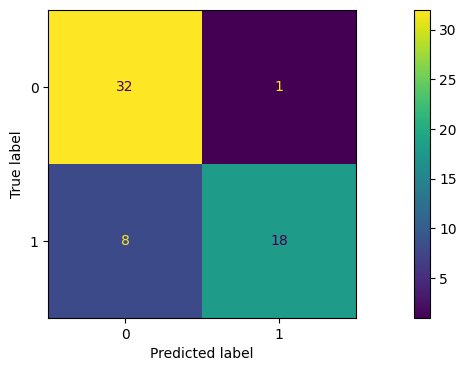

In [107]:
lcf = confusion_matrix(y_test, predlog)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=lcf, display_labels=logmodel.classes_)
disp.plot()


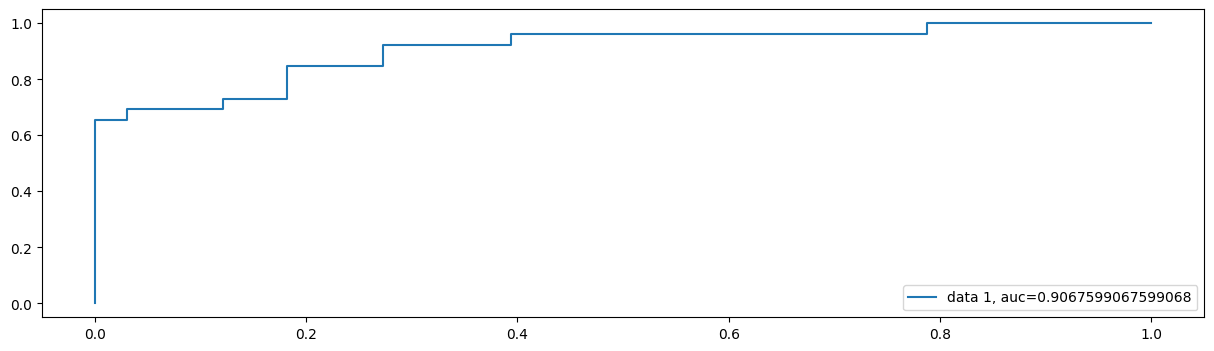

In [102]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**KNN Classifier**

In [103]:
Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9491525423728814, 0.9491525423728814, 0.9322033898305084, 0.9491525423728814, 0.9152542372881356, 0.9152542372881356, 0.8813559322033898, 0.9152542372881356]


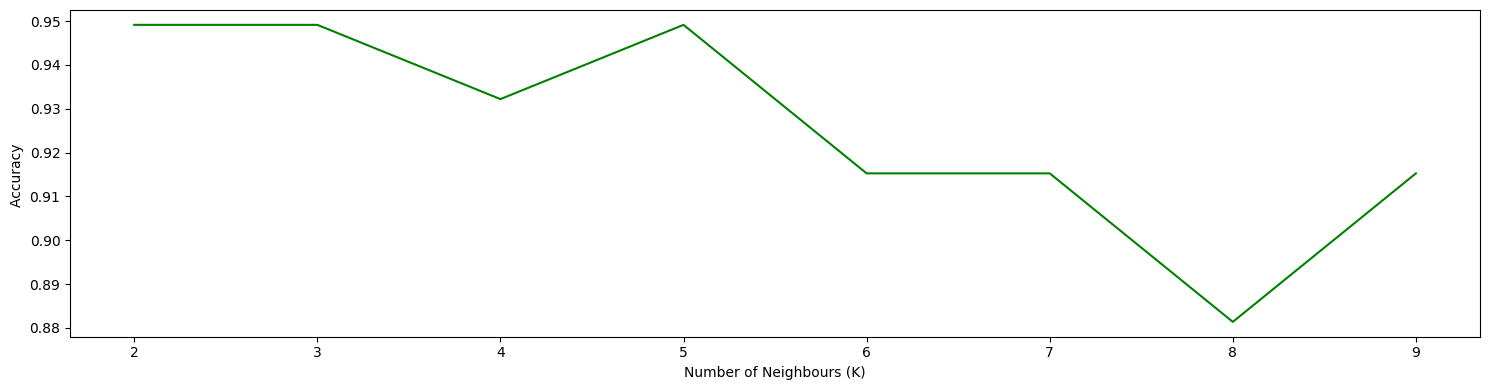

In [105]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [106]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

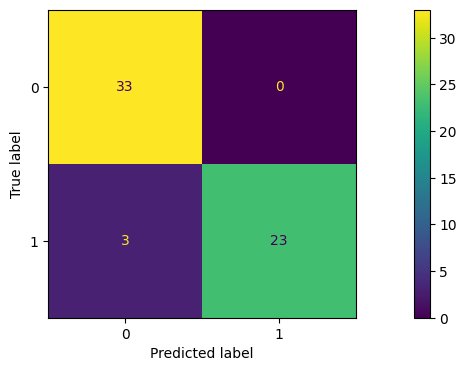

In [109]:
kn1 = confusion_matrix(y_test, predKNN)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=kn1, display_labels=knn.classes_)
disp.plot()


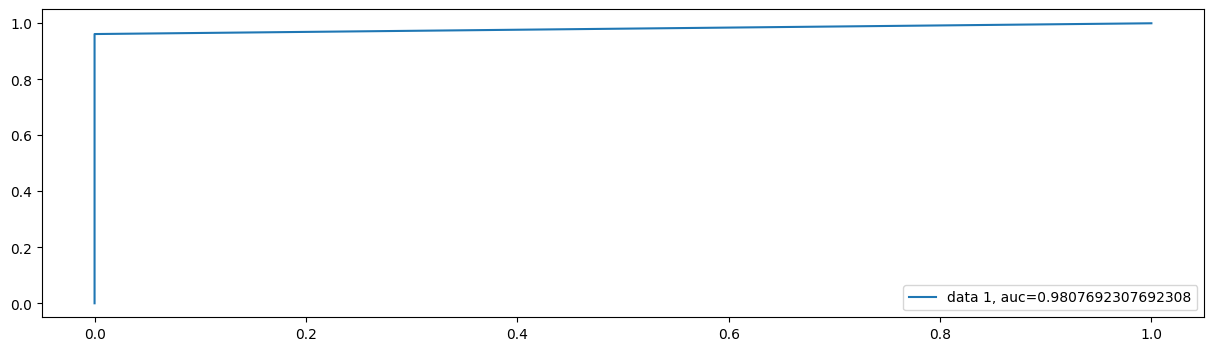

In [110]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



**Model Comparision Table**

In [128]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'Decision Tree':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'Random Forest':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'Logistic Regression':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)]}
chart = pd.DataFrame(chart)


In [130]:
display(chart)

,Metric,Decision Tree,Random Forest,Logistic Regression,SVM,KNN
0,Accuracy,0.915254,0.949153,0.847458,0.983051,0.949153
1,F1-Score,0.893617,0.941176,0.800000,0.980392,0.938776
2,Recall,0.807692,0.923077,0.692308,0.961538,0.884615
3,Precision,1.000000,0.960000,0.947368,1.000000,1.000000
4,R2-Score,0.656177,0.793706,0.381119,0.931235,0.793706
